In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/weather.csv')

In [ ]:
#step1:load the file
file_path = '/content/drive/MyDrive/weather.csv'
df = pd.read_csv(file_path)
print("\nStep 1: Load the Data")
print(df.head())
print(df.info())
print(df.describe())

In [ ]:
# Step 2: Data Exploration
print("\nStep 2: Data Exploration")
print(df.describe())




Step 2: Data Exploration
          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000

In [ ]:
# Check if 'Date' column exists, otherwise generate random dates
if 'Date' not in df.columns:
    num_rows = df.shape[0]
    start_date = pd.to_datetime('2020-01-01')
    df['Date'] = pd.date_range(start=start_date, periods=num_rows, freq='D')



Step 3: Data Visualization


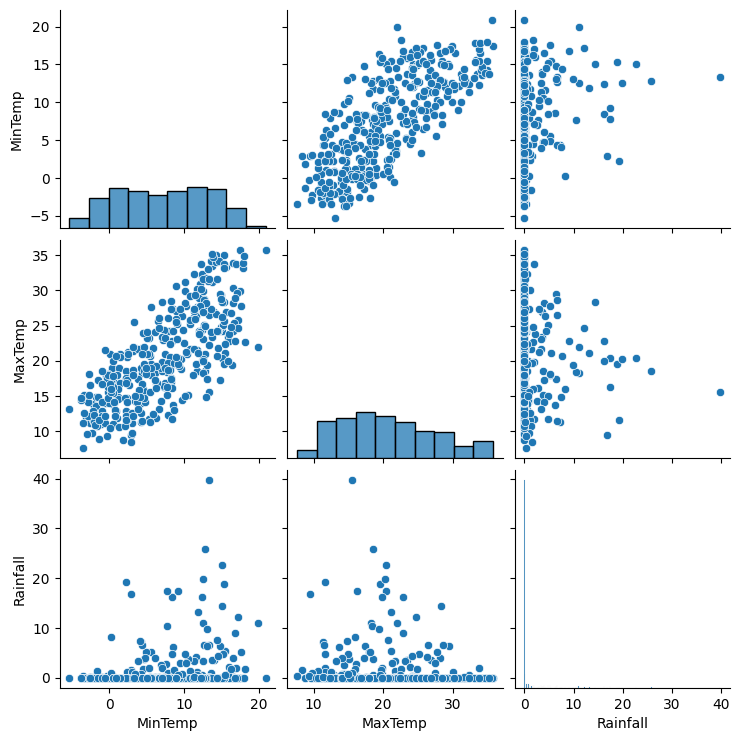

In [ ]:
# Step 3: Data Visualization
print("\nStep 3: Data Visualization")
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()


In [ ]:
# Step 4: Feature Engineering (if needed)
print("\nStep 4: Feature Engineering")
# Example: Create a new feature for temperature range
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
print(df[['MinTemp', 'MaxTemp', 'TempRange']].head())




Step 4: Feature Engineering
   MinTemp  MaxTemp  TempRange
0      8.0     24.3       16.3
1     14.0     26.9       12.9
2     13.7     23.4        9.7
3     13.3     15.5        2.2
4      7.6     16.1        8.5


In [ ]:
# Step 5: Data Analysis (analyze each term)
print("\nStep 5: Data Analysis")
# Example: Calculate average MaxTemp by month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()
print(monthly_avg_max_temp)



Step 5: Data Analysis
Month
1     24.903226
2     24.993103
3     29.309677
4     24.680000
5     25.987097
6     19.500000
7     17.232258
8     14.445161
9     11.690000
10    12.841935
11    18.013333
12    23.025806
Name: MaxTemp, dtype: float64



Step 6: Data Visualization (Part 2)


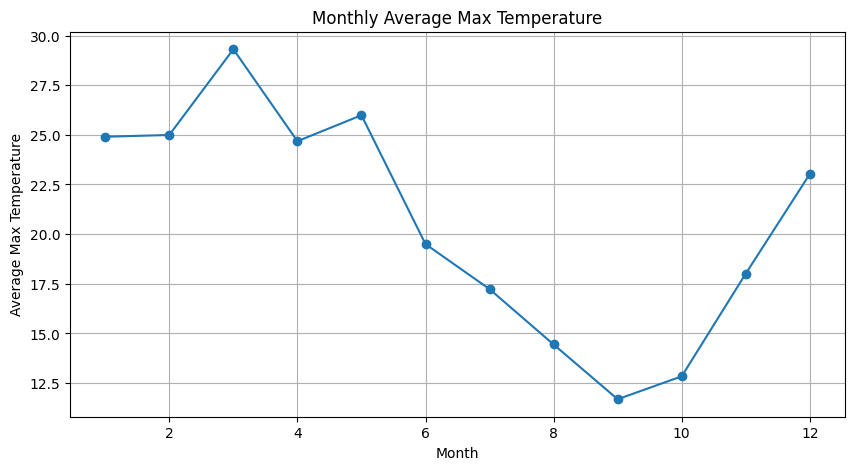

In [ ]:
# Step 6: Data Visualization (Part 2)
print("\nStep 6: Data Visualization (Part 2)")
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()



In [ ]:
# Step 7: Advanced Analysis (e.g., predict Rainfall)
print("\nStep 7: Advanced Analysis")
# Prepare the data for prediction
# Handling missing values by filling numeric columns with mean and dropping non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')




Step 7: Advanced Analysis
Mean Squared Error for Rainfall Prediction: 37.0768456005826


In [ ]:
# Step 8: Conclusions and Insights (analyze each term)
print("\nStep 8: Conclusions and Insights")
# Example: Identify the highest and lowest rainfall months
monthly_avg_rainfall = df.groupby('Month')['Rainfall'].mean()
highest_rainfall_month = monthly_avg_rainfall.idxmax()
lowest_rainfall_month = monthly_avg_rainfall.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')




Step 8: Conclusions and Insights
Highest rainfall month: 1, Lowest rainfall month: 7


In [ ]:
# Step 9: Communication (Optional)
print("\nStep 9: Communication")
# Example: Save results to a CSV file
results = pd.DataFrame({
    'Month': monthly_avg_rainfall.index,
    'AverageMaxTemp': monthly_avg_max_temp.values,
    'AverageRainfall': monthly_avg_rainfall.values
})
results.to_csv('monthly_weather_summary.csv', index=False)
print('Results saved to monthly_weather_summary.csv')



Step 9: Communication
Results saved to monthly_weather_summary.csv


In [ ]:
print("\nStep 10: Future Work")
print("Consider additional analyses or improvements.")


Step 10: Future Work
Consider additional analyses or improvements.
